In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

647

In [7]:
import requests
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | amahai
Processing Record 7 of Set 1 | mackay
Processing Record 8 of Set 1 | kizilskoye
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | khasan
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | chicama
Processing Record 13 of Set 1 | valparaiso
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | stalybridge
Processing Record 17 of Set 1 | dawlatabad
Processing Record 18 of Set 1 | rawson
Processing Record 19 of Set 1 | hue
Processing Record 20 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 21 of Set 1 | peru
Processing Record 22 of Set 1 | tromso
Processi

Processing Record 39 of Set 4 | kiama
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | petauke
Processing Record 43 of Set 4 | yairipok
Processing Record 44 of Set 4 | ambilobe
Processing Record 45 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 46 of Set 4 | moindou
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | waspan
Processing Record 49 of Set 4 | waipawa
Processing Record 50 of Set 4 | srednekolymsk
Processing Record 1 of Set 5 | komsomolskiy
Processing Record 2 of Set 5 | alakurtti
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | wahiawa
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | howard springs
Processing Record 7 of Set 5 | okha
Processing Record 8 of Set 5 | gilgit
Processing Record 9 of Set 5 | bredasdorp
Processing Record 10 of Set 5 | bethel
Processing Record 11 of Set 5 | clyde rive

Processing Record 29 of Set 8 | tupelo
Processing Record 30 of Set 8 | dandong
Processing Record 31 of Set 8 | sarkand
Processing Record 32 of Set 8 | liverpool
Processing Record 33 of Set 8 | murgab
Processing Record 34 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 8 | gat
Processing Record 36 of Set 8 | the pas
Processing Record 37 of Set 8 | kuznechnoye
Processing Record 38 of Set 8 | los llanos de aridane
Processing Record 39 of Set 8 | lodja
Processing Record 40 of Set 8 | hingatungan
Processing Record 41 of Set 8 | oranjemund
Processing Record 42 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 8 | montepuez
Processing Record 44 of Set 8 | leshukonskoye
Processing Record 45 of Set 8 | sokoto
Processing Record 46 of Set 8 | pombas
Processing Record 47 of Set 8 | talawdi
City not found. Skipping...
Processing Record 48 of Set 8 | huntsville
Processing Record 49 of Set 8 | kirakira
Processing Record 50 of Set 8 | solne

Processing Record 15 of Set 12 | port-gentil
Processing Record 16 of Set 12 | coihaique
Processing Record 17 of Set 12 | green river
Processing Record 18 of Set 12 | tondano
Processing Record 19 of Set 12 | cravo norte
Processing Record 20 of Set 12 | pasuruan
Processing Record 21 of Set 12 | lida
Processing Record 22 of Set 12 | katangli
Processing Record 23 of Set 12 | zhigansk
Processing Record 24 of Set 12 | bandarbeyla
Processing Record 25 of Set 12 | siguiri
Processing Record 26 of Set 12 | dicamay
Processing Record 27 of Set 12 | caravelas
Processing Record 28 of Set 12 | rio gallegos
Processing Record 29 of Set 12 | mbandaka
Processing Record 30 of Set 12 | qujing
Processing Record 31 of Set 12 | ollioules
Processing Record 32 of Set 12 | eenhana
Processing Record 33 of Set 12 | baley
Processing Record 34 of Set 12 | marathon
Processing Record 35 of Set 12 | ganj muradabad
Processing Record 36 of Set 12 | yichang
Processing Record 37 of Set 12 | ilhabela
Processing Record 38 of

In [12]:
print(len(city_data))

595


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,55.40,35,40,28.86,CL,2020-12-22 21:52:10
1,Nanortalik,60.14,-45.24,31.15,95,100,12.06,GL,2020-12-22 21:52:09
2,Busselton,-33.65,115.33,61.00,78,0,1.99,AU,2020-12-22 21:54:39
3,New Norfolk,-42.78,147.06,62.01,63,24,3.00,AU,2020-12-22 21:52:24
4,Tuktoyaktuk,69.45,-133.04,-23.80,74,20,13.87,CA,2020-12-22 21:54:39
5,Amahai,-3.33,128.92,80.49,76,100,4.09,ID,2020-12-22 21:52:26
6,Mackay,-21.15,149.20,82.00,78,90,3.36,AU,2020-12-22 21:54:40
7,Kizilskoye,52.73,58.89,14.72,94,27,5.12,RU,2020-12-22 21:54:40
8,Saskylakh,71.92,114.08,-18.42,86,100,7.18,RU,2020-12-22 21:54:40
9,Khasan,42.43,130.64,27.45,83,0,1.36,RU,2020-12-22 21:54:41


In [14]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-12-22 21:52:10,-53.15,-70.92,55.40,35,40,28.86
1,Nanortalik,GL,2020-12-22 21:52:09,60.14,-45.24,31.15,95,100,12.06
2,Busselton,AU,2020-12-22 21:54:39,-33.65,115.33,61.00,78,0,1.99
3,New Norfolk,AU,2020-12-22 21:52:24,-42.78,147.06,62.01,63,24,3.00
4,Tuktoyaktuk,CA,2020-12-22 21:54:39,69.45,-133.04,-23.80,74,20,13.87
5,Amahai,ID,2020-12-22 21:52:26,-3.33,128.92,80.49,76,100,4.09
6,Mackay,AU,2020-12-22 21:54:40,-21.15,149.20,82.00,78,90,3.36
7,Kizilskoye,RU,2020-12-22 21:54:40,52.73,58.89,14.72,94,27,5.12
8,Saskylakh,RU,2020-12-22 21:54:40,71.92,114.08,-18.42,86,100,7.18
9,Khasan,RU,2020-12-22 21:54:41,42.43,130.64,27.45,83,0,1.36


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

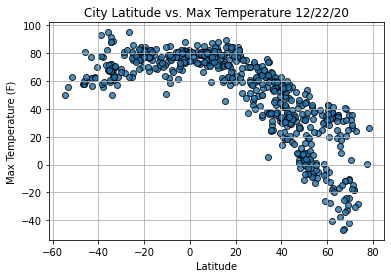

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

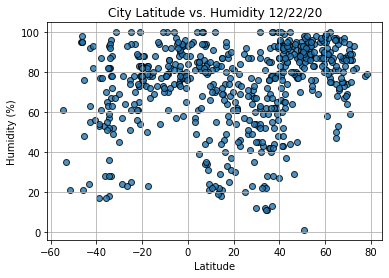

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

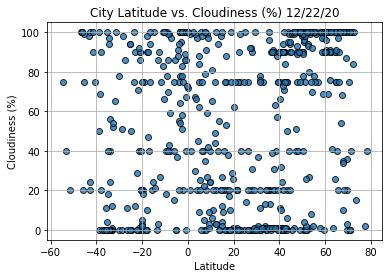

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

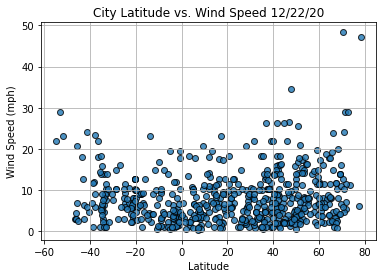

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()